Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import numpy as np

In [39]:
df_app = pd.read_csv('Google-Playstore-32K/Google-Playstore-32K.csv')
df_app.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [40]:
df_app['Installs'].unique()

array(['5,000,000+', '100,000,000+', '100,000+', '10,000,000+', '10,000+',
       '1,000,000+', '50,000,000+', '500,000+', '50,000+', '5,000+',
       '1,000+', '500,000,000+', '1,000,000,000+', '5,000,000,000+',
       '100+', '500+', '50+', '5+', '10+', '1+', 'EDUCATION', '6',
       '11976', '0+'], dtype=object)

In [41]:
df_app = df_app.drop(np.where(df_app['Installs'] == 'EDUCATION')[0])

In [42]:
df_app['Installs'] = df_app['Installs'].str.replace('+', '')
df_app['Installs'] = df_app['Installs'].str.replace(',', '')
df_app['Installs'] = df_app.Installs.astype('int64')

In [43]:
df_app['Rating'] = df_app[~df_app['Rating'].isin(['GAME_STRATEGY', 'NEWS_AND_MAGAZINES'])][['Rating']].astype('float64')
df_app.loc[(df_app['Rating'] < 2.5), 'Rating_class'] = 'Низкий'
df_app.loc[((df_app['Rating'] >= 2.5) & (df_app['Rating'] < 4)), 'Rating_class'] = 'Средний'
df_app.loc[(df_app['Rating'] >= 4), 'Rating_class'] = 'Высокий'

In [44]:
df_app.loc[pd.isnull(df_app['Rating_class']), 'Rating_class'] = 'Средний'

In [45]:
df_app.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Rating_class
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,Высокий
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,Высокий
2,Peapod,SHOPPING,3.656329,1967.0,100000,1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,Средний
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,Высокий
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000,Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,Высокий


In [46]:
# топ-10 по доходности
df_app_bar = df_app.sort_values('Reviews', ascending = False).head(10)
df_app_bar

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Rating_class
671,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1000000000,Varies with device,0,Everyone,"March 27, 2019",Varies with device,Varies with device,Высокий
704,Facebook,SOCIAL,4.087946,85766433.0,1000000000,Varies with device,0,Teen,"April 2, 2019",Varies with device,Varies with device,Высокий
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0,Teen,"April 2, 2019",Varies with device,Varies with device,Высокий
632,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1000000000,Varies with device,0,Everyone,"April 2, 2019",Varies with device,Varies with device,Высокий
628,Clash of Clans,GAME_STRATEGY,4.606215,48401470.0,500000000,103M,0,Everyone 10+,"April 2, 2019",4.1 and up,11.446.11,Высокий
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20M,0,Everyone,"April 1, 2019",Varies with device,7.0.6,Высокий
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0,Teen,"April 2, 2019",Varies with device,Varies with device,Высокий
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85M,0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0,Высокий
12638,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.652842,25532160.0,500000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,4.9.1,Высокий
1542,Clash Royale,GAME_STRATEGY,4.545474,25449254.0,100000000,81M,0,Everyone 10+,"February 13, 2019",4.1 and up,2.6.1,Высокий


Text(0.5, 1.0, 'Top 10 most profitable apps')

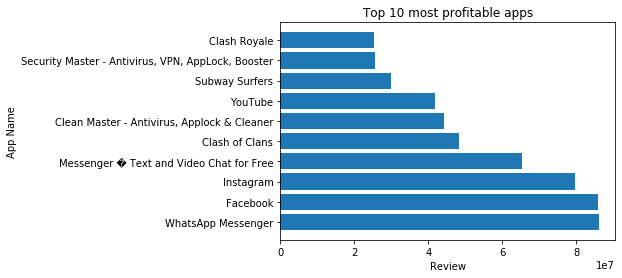

In [13]:
plt.barh(df_app_bar['App Name'], df_app_bar['Reviews'])
plt.xlabel('Review')
plt.ylabel('App Name')
plt.title('Top 10 most profitable apps')

На данной диаграмме выводятся топ-10 приложений, приносящих наибольший доход. Дает наглядное представление о сумме дохода в сравнении с другими приложениями

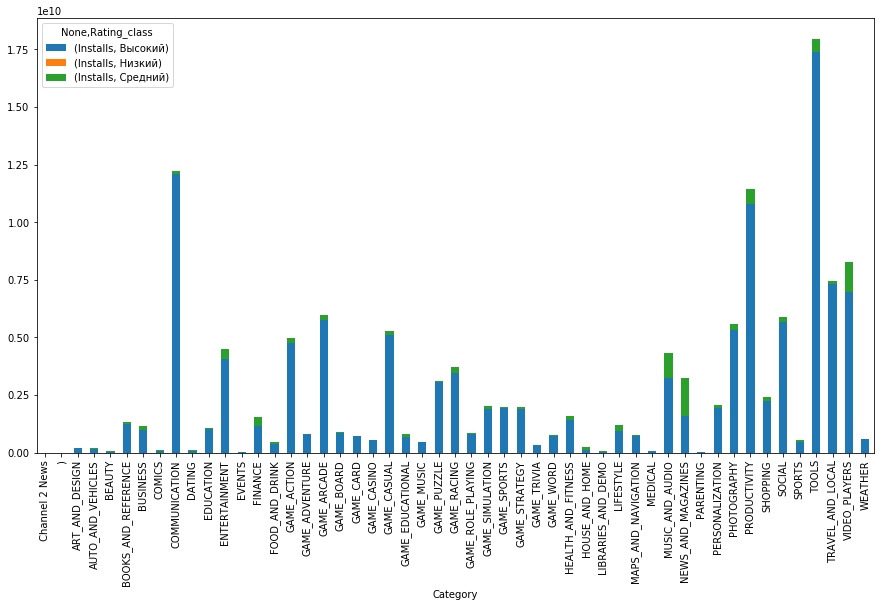

In [14]:
#количество скачиваний по категориям в зависимости от рейтинга
count_download = df_app.groupby([df_app.Category, 'Rating_class'])[['Installs']].sum().sort_values(by = 'Category', ascending = False)
count_download.unstack('Rating_class').plot(kind='bar', stacked=True, figsize = (15,8))

Из визуализации видим наиболее популярные приложения, а также видим, что большинство приложений имеет высокие рейтинги, и зависимость частоты скачивания от рейтинга не просматривается.

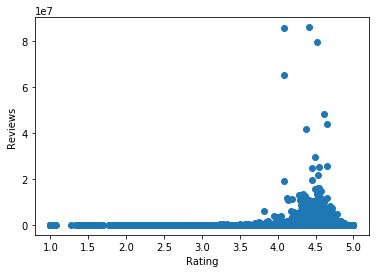

In [15]:
# взаимосвязь доходности приложения и его рейтинга
Rating = df_app['Rating']
Reviews = df_app['Reviews']
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.scatter(Rating, Reviews)

На данном графике можно наблюдать, что наиболее прибыльными являются приложения с высокими рейтингами, но максимальные доходы приносят приложения с рейтингами, близкими к средним.

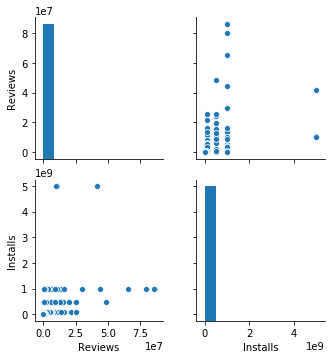

In [19]:
# взаимосвязь доходности и популярности
sns_plot = sns.pairplot(df_app[['Reviews', 'Installs']])
sns_plot

Из визуализации понимаем, что наибольшие доходы приносят не самые популярные приложения.

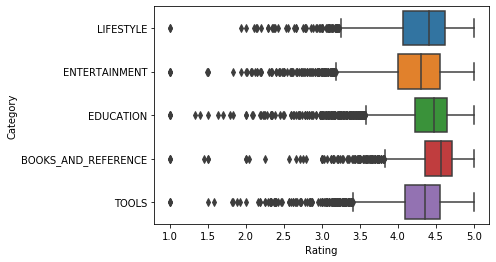

In [35]:
# рейтинги у наиболее широко представленных категорий приложений
big_category = df_app.Category.value_counts().sort_values(ascending = False).head(5).index.values
big_category
ax = sns.boxplot(y="Category", x="Rating", data=df_app[df_app.Category.isin(big_category)], orient="h")

На графике представлены топ-5 категорий приложений с наиболее широкой линейкой и распределения рейтингов в этих категориях. Видим, что разброс значений во всех категориях в части высоких рейтингов, но у всех есть и низкие оценки. Категория "Books_and_refence" имеет минимальный разброс значений.